In [213]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [171]:
tweet= pd.read_csv(r"C:\Users\sonka\Desktop\Analysis\Twitter\Tweets.csv")
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [172]:
tweet.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [173]:
tweet.shape

(14640, 15)

In [174]:
tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Text(0,0.5,'No. of Tweets')

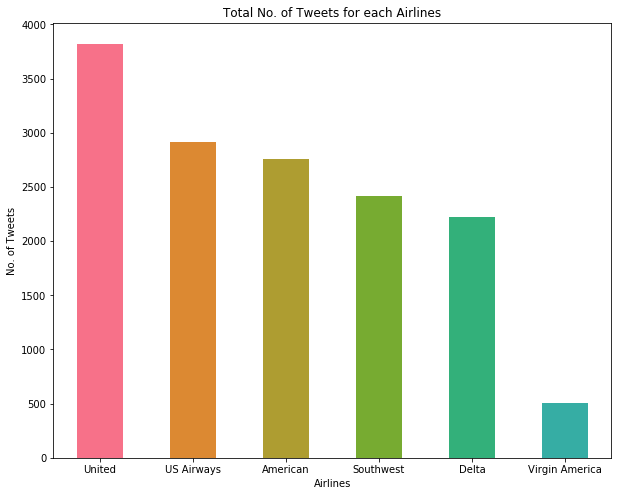

In [175]:
#Plotting the number of tweets each airlines has received
colors=sns.color_palette("husl", 10) 
pd.Series(tweet["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(10,8),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [176]:
#counting the number of each type of sentiments 
tweet['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0,0.5,'No. of Tweets')

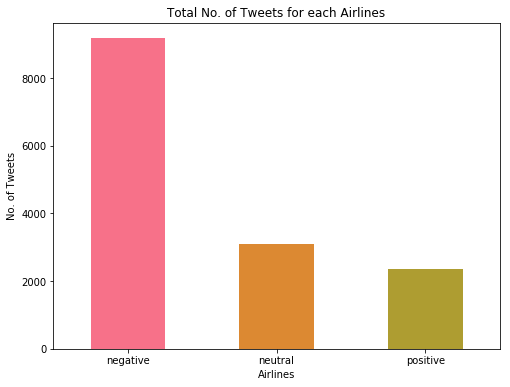

In [177]:
colors=sns.color_palette("husl", 10) 
pd.Series(tweet["airline_sentiment"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

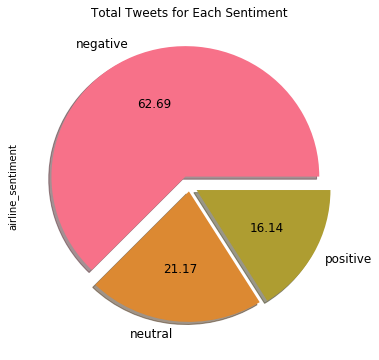

In [203]:
colors=sns.color_palette("husl", 10)
pd.Series(tweet["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.08,0.04,0.06],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

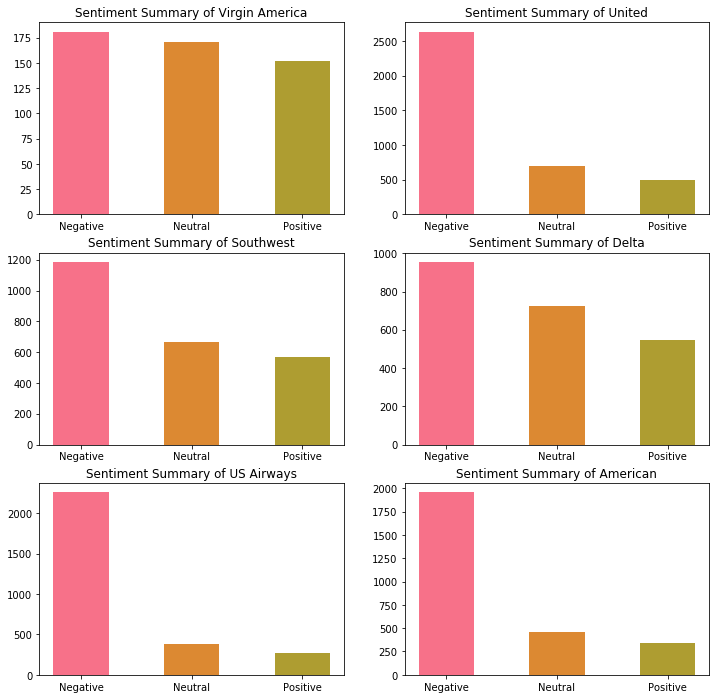

In [179]:
def plot_sub_sentiment(Airline):
    pdf = tweet[tweet['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = tweet['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

In [180]:
#counting the total number of negative reasons
tweet['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0,0.5,'No. of Tweets')

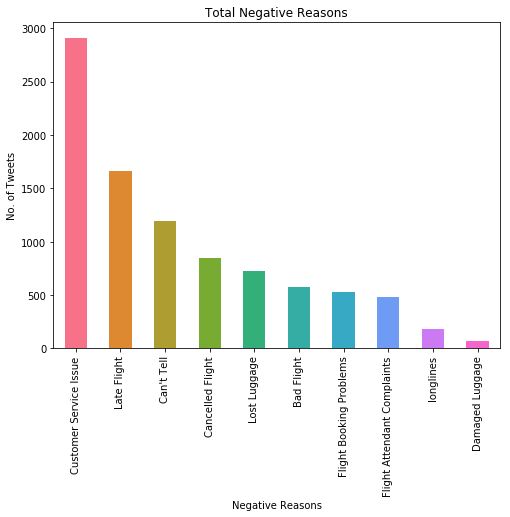

In [181]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(tweet["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [182]:
tweet['negativereason'].value_counts().head(6)

Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Bad Flight                 580
Name: negativereason, dtype: int64

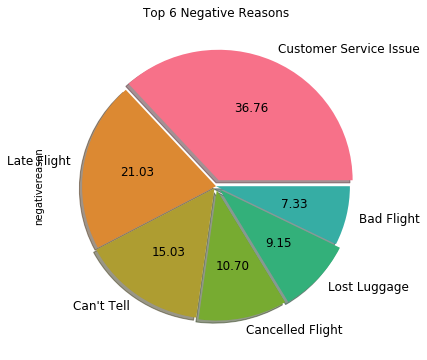

In [183]:
color=sns.color_palette("husl", 10)
pd.Series(tweet["negativereason"]).value_counts().head(6).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage","Bad Flight"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04,0],shadow=True,
                fontsize=12,figsize=(6, 6),title="Top 6 Negative Reasons")

In [184]:
air_senti=pd.crosstab(tweet.airline, tweet.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [185]:
percent=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


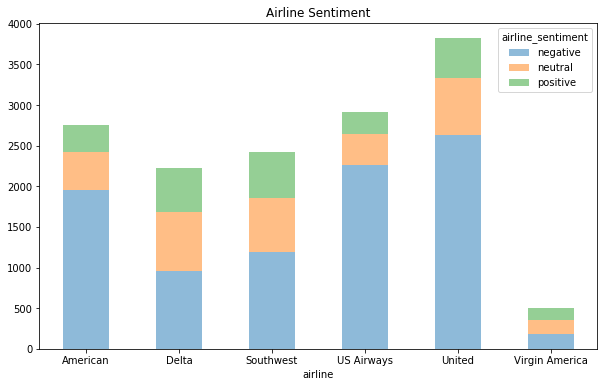

In [186]:
pd.crosstab(index = tweet["airline"],columns = tweet["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

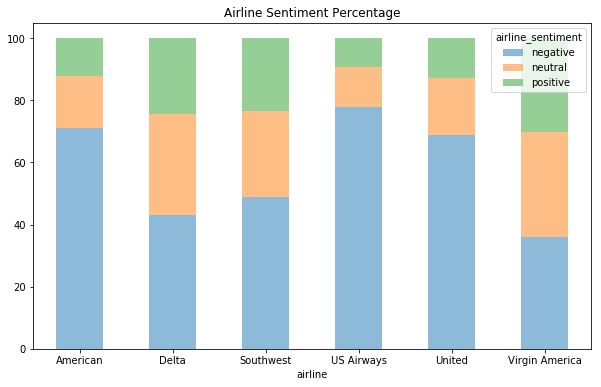

In [187]:
percent.plot(kind='bar',figsize=(10, 6),alpha=0.5,
                rot=0,stacked=True,title="Airline Sentiment Percentage")

In [188]:
tweet['tweet_created'] = pd.to_datetime(tweet['tweet_created'])
tweet["date_created"] = tweet["tweet_created"].dt.date

In [189]:
tweet["date_created"]

0        2015-02-24
1        2015-02-24
2        2015-02-24
3        2015-02-24
4        2015-02-24
5        2015-02-24
6        2015-02-24
7        2015-02-24
8        2015-02-24
9        2015-02-24
10       2015-02-24
11       2015-02-24
12       2015-02-24
13       2015-02-24
14       2015-02-24
15       2015-02-24
16       2015-02-24
17       2015-02-24
18       2015-02-24
19       2015-02-24
20       2015-02-24
21       2015-02-24
22       2015-02-24
23       2015-02-24
24       2015-02-24
25       2015-02-24
26       2015-02-24
27       2015-02-24
28       2015-02-24
29       2015-02-24
            ...    
14610    2015-02-22
14611    2015-02-22
14612    2015-02-22
14613    2015-02-22
14614    2015-02-22
14615    2015-02-22
14616    2015-02-22
14617    2015-02-22
14618    2015-02-22
14619    2015-02-22
14620    2015-02-22
14621    2015-02-22
14622    2015-02-22
14623    2015-02-22
14624    2015-02-22
14625    2015-02-22
14626    2015-02-22
14627    2015-02-22
14628    2015-02-22


In [190]:
df = tweet.groupby(['date_created','airline'])
df = df.airline_sentiment.value_counts()
df.unstack()

airline_sentiment            negative  neutral  positive
date_created airline                                    
2015-02-17   Delta               51.0     63.0      47.0
             Southwest          162.0     69.0      56.0
             US Airways         156.0     22.0      33.0
             United             173.0     50.0      29.0
             Virgin America      10.0     16.0      16.0
2015-02-18   Delta              127.0     84.0      78.0
             Southwest          143.0     96.0      90.0
             US Airways         259.0     29.0      44.0
             United             281.0     74.0      53.0
             Virgin America      17.0     21.0      20.0
2015-02-19   American             1.0      NaN       1.0
             Delta              127.0     68.0      74.0
             Southwest          103.0    102.0      86.0
             US Airways         189.0     58.0      34.0
             United             224.0     97.0      71.0
             Virgin America      22.0     21.0      20.0
2015-02-20   American             1.0      NaN       NaN
             Delta              108.0     97.0      78.0
             Southwest          139.0     98.0      73.0
             US Airways         234.0     50.0      34.0
             United             347.0    104.0      78.0
             Virgin America      20.0     34.0      17.0
2015-02-21   American             1.0      NaN       NaN
             Delta               91.0     78.0      55.0
             Southwest          219.0     77.0      64.0
             US Airways         224.0     31.0      26.0
             United             333.0     72.0      72.0
             Virgin America      33.0     14.0      28.0
2015-02-22   American           316.0     46.0      42.0
             Delta              221.0     82.0      83.0
             Southwest          143.0     52.0      53.0
             US Airways         536.0     58.0      28.0
             United             494.0    109.0      63.0
             Virgin America      34.0     20.0      12.0
2015-02-23   American          1071.0    214.0     144.0
             Delta              160.0    181.0      83.0
             Southwest          151.0    107.0      94.0
             US Airways         431.0     76.0      46.0
             United             503.0    103.0      71.0
             Virgin America      30.0     30.0      20.0
2015-02-24   American           570.0    203.0     149.0
             Delta               70.0     70.0      46.0
             Southwest          126.0     63.0      54.0
             US Airways         234.0     57.0      24.0
             United             278.0     88.0      55.0
             Virgin America      15.0     15.0      19.0

In [191]:
#visualization using wordcloud for the negative tweets
df=tweet[tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()if 'http' not in wordand not word.startswith('@')and word != 'RT'])

SyntaxError: invalid syntax (<ipython-input-191-b6d7f9bb2af0>, line 4)

In [192]:
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000,height=2500).generate(cleaned_word)

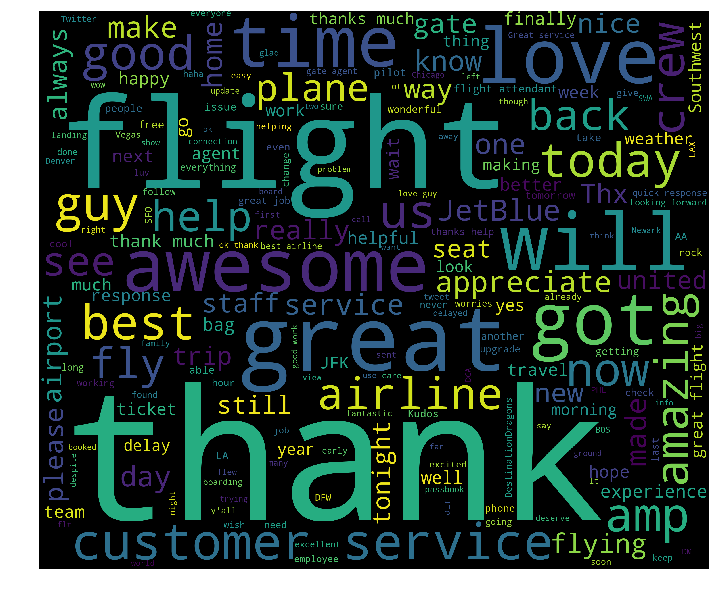

In [193]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [194]:
#visualization using wordcloud for the positive tweets
df=tweet[tweet['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()if 'http' not in word and not word.startswith('@')and word != 'RT'])

In [195]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',width=3000,height=2500).generate(cleaned_word)

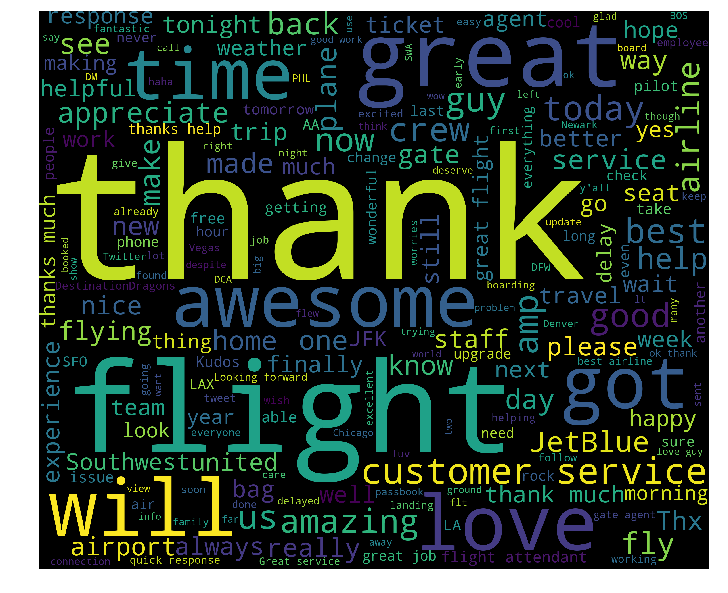

In [196]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [197]:
#visualization using wordcloud for the positive tweets
df=tweet[tweet['airline_sentiment']=='neutral']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()if 'http' not in word and not word.startswith('@')and word != 'RT'])

In [198]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',width=3000,height=2500).generate(cleaned_word)

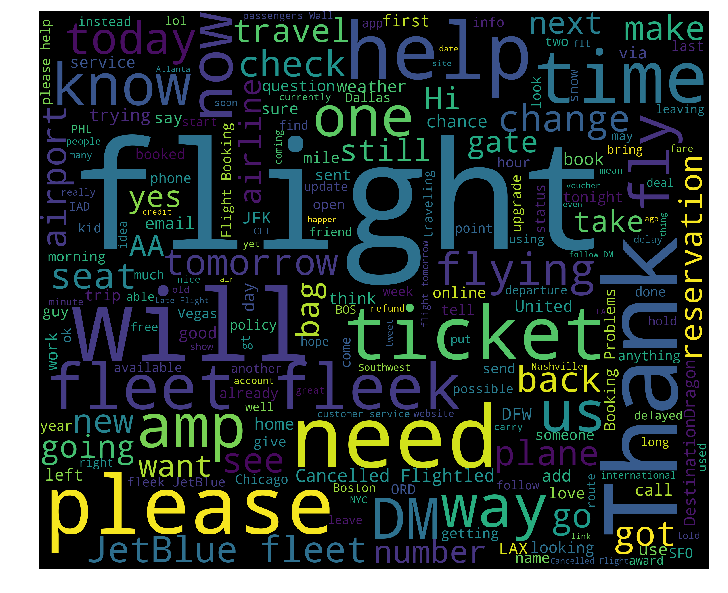

In [199]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [200]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [201]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [202]:
tweet['sentiment']=tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
tweet.sentiment.head()

0    1
1    1
2    1
3    0
4    0
Name: sentiment, dtype: int64

In [209]:
#Splitting the data into train and test
tweet['clean_tweet']=tweet['text'].apply(lambda x: tweet_to_words(x))
tweet['Tweet_length']=tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(tweet,test_size=0.2,random_state=42)

In [210]:
train_clean_tweet=[]
for tweets in train['clean_tweet']:
    train_clean_tweet.append(tweets)
test_clean_tweet=[]
for tweets in test['clean_tweet']:
    test_clean_tweet.append(tweets)

In [211]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [214]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [215]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.645150273224
Accuracy of KNeighborsClassifier is 0.589139344262
Accuracy of SVC is 0.645150273224
Accuracy of DecisionTreeClassifier is 0.757855191257
Accuracy of RandomForestClassifier is 0.814207650273
Accuracy of AdaBoostClassifier is 0.785519125683
Accuracy of GaussianNB is 0.572404371585


Text(0.5,1,'Accuracies of Models')

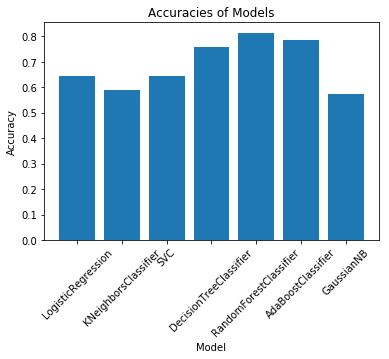

In [216]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')